# Data Munging ReEDS output data files for input installations

To explore different scenarios for furture installation projections of PV (or any technology), ReEDS output data can be useful in providing standard scenarios. This input data will be used in the module files input to the PVDEMICE tool. Some will be used to explore middle, low and high projections, some for the Solar Futures Report. This journal extracts the data relevant for the current status of the PVDEMICE tool from ReEDS outputs.

In [1]:
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
import os
from pathlib import Path

reedsFile = str(Path().resolve().parent.parent.parent / 'December Core Scenarios ReEDS Outputs Solar Futures.xlsx')
testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP')

print ("Input file is stored in %s" % reedsFile)
print ("Your simulation will be stored in %s" % testfolder)


Input file is stored in C:\Users\sayala\Documents\GitHub\December Core Scenarios ReEDS Outputs Solar Futures.xlsx
Your simulation will be stored in C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [3]:
cwd = os.getcwd() #grabs current working directory
rawdf = pd.read_excel(reedsFile,
                        sheet_name="Solar Capacity (GW)")
                        #index_col=[0,2,3]) #this casts scenario, PCA and State as levels
#now set year as an index in place
rawdf.drop(columns=['State'], inplace=True)
rawdf.set_index(['scenario','year','PCA'], inplace=True)


In [4]:
rawdf.index.get_level_values('scenario').unique()

Index(['Reference.Mod', 'Reference.Adv', 'Reference.Adv+DR', '95-by-35.Mod',
       '95-by-35.Adv', '95-by-35.Adv+DR', '95-by-35+Elec.Mod',
       '95-by-35+Elec.Adv', '95-by-35+Elec.Adv+DR'],
      dtype='object', name='scenario')

In [5]:
scenarios = list(rawdf.index.get_level_values('scenario').unique())
PCAs = list(rawdf.index.get_level_values('PCA').unique())
scenarios

['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv+DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv+DR',
 '95-by-35+Elec.Mod',
 '95-by-35+Elec.Adv',
 '95-by-35+Elec.Adv+DR']

In [6]:
import PV_ICE
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)
r1.createScenario(name='US', file=r'..\baselines\baseline_modules_US.csv')
baseline = r1.scenario['US'].data
baseline = baseline.drop(columns=['new_Installed_Capacity_[MW]'])
baseline.set_index('year', inplace=True)
baseline.index = pd.PeriodIndex(baseline.index, freq='A')  # A -- Annual


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [7]:
baseline

,mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,mod_Repowering,mod_Repairing
year,,,,,,,,,,
1995,12.500000,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
1996,12.700000,15.0,20.0,0.55,10.0,95.0,15.0,40.0,0.0,0.0
1997,12.880000,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
1998,13.060000,16.0,21.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
1999,13.240000,17.0,22.0,0.55,15.0,95.0,15.0,40.0,0.0,0.0
2000,13.420000,17.0,22.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2001,13.600000,18.0,23.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2002,13.722222,18.0,23.0,0.60,25.0,95.0,15.0,40.0,0.0,0.0
2003,13.844444,18.0,23.0,0.60,25.0,96.0,15.0,40.0,0.0,0.0


In [56]:
for ii in range (len(rawdf.unstack(level=1))):
    PCA = rawdf.unstack(level=1).iloc[ii].name[1]
    SCEN = rawdf.unstack(level=1).iloc[ii].name[0]
    SCEN=SCEN.replace('+', '_')
    filetitle = SCEN+'_'+PCA +'.csv'
    filetitle = os.path.join(testfolder, filetitle)
    A = rawdf.unstack(level=1).iloc[ii]
    A = A.droplevel(level=0)
    A.name = 'new_Installed_Capacity_[MW]'
    A = pd.DataFrame(A)
    A.index=pd.PeriodIndex(A.index, freq='A')
    A = A.resample('Y').asfreq()
    A = A['new_Installed_Capacity_[MW]'].fillna(0).groupby(A['new_Installed_Capacity_[MW]'].notna().cumsum()).transform('mean')    
    A = pd.DataFrame(A)
    A['new_Installed_Capacity_[MW]'] = A['new_Installed_Capacity_[MW]'] * 1000
    # Add other columns
    A = pd.concat([A, baseline.reindex(A.index)], axis=1)

    header = "year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,"\
    "mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,"\
    "mod_Repowering,mod_Repairing\n"\
    "year,MW,%,years,years,%,years,%,%,%,%,%\n"

    with open(filetitle, 'w', newline='') as ict:
    # Write the header lines, including the index variable for
    # the last one if you're letting Pandas produce that for you.
    # (see above).
        for line in header:
            ict.write(line)

        #    savedata.to_csv(ict, index=False)
        A.to_csv(ict, header=False)

In [57]:
# EXAMPLE FOR JUST ONE 
ii = 0
PCA = rawdf.unstack(level=1).iloc[ii].name[1]
SCEN = rawdf.unstack(level=1).iloc[ii].name[0]
SCEN=SCEN.replace('+', '_')
filetitle = SCEN+'_'+PCA +'.csv'
filetitle = os.path.join(testfolder, filetitle)
A = rawdf.unstack(level=1).iloc[ii]        
A = A.droplevel(level=0)
A.name = 'new_Installed_Capacity_[MW]'
A = pd.DataFrame(A)
A['new_Installed_Capacity_[MW]'] = A['new_Installed_Capacity_[MW]'] * 1000
A.index=pd.PeriodIndex(A.index, freq='A')
B = A.resample('Y').asfreq()
B = B['new_Installed_Capacity_[MW]'].fillna(0).groupby(B['new_Installed_Capacity_[MW]'].notna().cumsum()).transform('mean')
B = pd.DataFrame(B)
B.to_csv(filetitle)

# Add other columns
B = pd.concat([B, baseline.reindex(B.index)], axis=1)


header = "year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,"\
"mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,"\
"mod_Repowering,mod_Repairing\n"\
"year,MW,%,years,years,%,years,%,%,%,%,%\n"

with open(filetitle, 'w', newline='') as ict:
# Write the header lines, including the index variable for
# the last one if you're letting Pandas produce that for you.
# (see above).
    for line in header:
        ict.write(line)

    #    savedata.to_csv(ict, index=False)
    B.to_csv(ict, header=False)


## Reading inputs and creating scenarios

In [8]:
GISfile = str(Path().resolve().parent.parent.parent / 'gis_centroid_n.xlsx')
GIS = pd.read_excel(GISfile)
GIS = GIS.set_index('id')

In [9]:
GIS.head()

,long,lat,country
id,,,
p1,-121.452252,47.820991,USA
p10,-117.159039,35.120104,USA
p100,-78.257714,38.791108,USA
p101,-82.192477,28.708695,USA
p102,-80.563731,26.677092,USA


In [10]:
GIS.loc['p1'].long

-121.4522522

In [11]:
simulationname = scenarios
simulationname = [w.replace('+', '_') for w in simulationname]
PCA = PCAs[0]
simulationname


['Reference.Mod',
 'Reference.Adv',
 'Reference.Adv_DR',
 '95-by-35.Mod',
 '95-by-35.Adv',
 '95-by-35.Adv_DR',
 '95-by-35_Elec.Mod',
 '95-by-35_Elec.Adv',
 '95-by-35_Elec.Adv_DR']

In [79]:
for ii in range (0, 1): #len(scenarios):
    r1 = PV_ICE.Simulation(name=scenarios[ii], path=testfolder)
    for jj in range (0, len(PCAs)): 
        filetitle = scenarios[ii]+'_'+PCAs[jj]+'.csv'
        filetitle = os.path.join(testfolder, filetitle)        
        r1.createScenario(name=PCAs[jj], file=filetitle)
        r1.scenario[PCAs[jj]].addMaterial('glass', file=r'..\baselines\baseline_material_glass_Reeds.csv')
        r1.scenario[PCAs[jj]].latitude = GIS.loc[PCAs[jj]].lat
        r1.scenario[PCAs[jj]].longitude = GIS.loc[PCAs[jj]].long


path = C:\Users\sayala\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP


In [80]:
r1.calculateMassFlow()

Working on Scenario:  p1
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p10
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p100
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p101
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p102
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p103
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p104
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p105
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Wor

Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p39
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p4
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p40
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p41
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p42
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p43
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p44
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
Working on Scenario:  p45
********************
Finished 

Finished Area+Power Generation Calculations
==> Working on Material :  glass


In [81]:
r1.scenario.keys()

dict_keys(['p1', 'p10', 'p100', 'p101', 'p102', 'p103', 'p104', 'p105', 'p106', 'p107', 'p108', 'p109', 'p11', 'p110', 'p111', 'p112', 'p113', 'p114', 'p115', 'p116', 'p117', 'p118', 'p119', 'p12', 'p120', 'p121', 'p122', 'p123', 'p124', 'p125', 'p126', 'p127', 'p128', 'p129', 'p13', 'p130', 'p131', 'p132', 'p133', 'p134', 'p14', 'p15', 'p16', 'p17', 'p18', 'p19', 'p2', 'p20', 'p21', 'p22', 'p23', 'p24', 'p25', 'p26', 'p27', 'p28', 'p29', 'p3', 'p30', 'p31', 'p32', 'p33', 'p34', 'p35', 'p36', 'p37', 'p38', 'p39', 'p4', 'p40', 'p41', 'p42', 'p43', 'p44', 'p45', 'p46', 'p47', 'p48', 'p49', 'p5', 'p50', 'p51', 'p52', 'p53', 'p54', 'p55', 'p56', 'p57', 'p58', 'p59', 'p6', 'p60', 'p61', 'p62', 'p63', 'p64', 'p65', 'p66', 'p67', 'p68', 'p69', 'p7', 'p70', 'p71', 'p72', 'p73', 'p74', 'p75', 'p76', 'p77', 'p78', 'p79', 'p8', 'p80', 'p81', 'p82', 'p83', 'p84', 'p85', 'p86', 'p87', 'p88', 'p89', 'p9', 'p90', 'p91', 'p92', 'p93', 'p94', 'p95', 'p96', 'p97', 'p98', 'p99'])

In [82]:
r1.scenario[PCAs[jj]].data.keys()

Index(['year', 'new_Installed_Capacity_[MW]', 'mod_eff', 'mod_reliability_t50',
       'mod_reliability_t90', 'mod_degradation', 'mod_lifetime', 'mod_MFG_eff',
       'mod_EOL_collection_eff', 'mod_EOL_collected_recycled',
       'mod_Repowering', 'mod_Repairing', 'Area',
       'Cumulative_Area_disposedby_Failure',
       'Cumulative_Area_disposedby_ProjectLifetime',
       'Cumulative_Area_disposed', 'Cumulative_Active_Area',
       'Installed_Capacity_[W]', 'EOL_on_Year_0', 'EOL_on_Year_1',
       'EOL_on_Year_2', 'EOL_on_Year_3', 'EOL_on_Year_4', 'EOL_on_Year_5',
       'EOL_on_Year_6', 'EOL_on_Year_7', 'EOL_on_Year_8', 'EOL_on_Year_9',
       'EOL_on_Year_10', 'EOL_on_Year_11', 'EOL_on_Year_12', 'EOL_on_Year_13',
       'EOL_on_Year_14', 'EOL_on_Year_15', 'EOL_on_Year_16', 'EOL_on_Year_17',
       'EOL_on_Year_18', 'EOL_on_Year_19', 'EOL_on_Year_20', 'EOL_on_Year_21',
       'EOL_on_Year_22', 'EOL_on_Year_23', 'EOL_on_Year_24', 'EOL_on_Year_25',
       'EOL_on_Year_26', 'EOL_on_Ye

In [83]:
r1.scenario[PCAs[jj]].material['glass'].materialdata.keys()

Index(['year', 'mat_virgin_eff', 'mat_massperm2', 'mat_MFG_eff',
       'mat_MFG_scrap_Recycled', 'mat_MFG_scrap_Recycling_eff',
       'mat_MFG_scrap_Recycled_into_HQ',
       'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG',
       'mat_EOL_collected_Recycled', 'mat_EOL_Recycling_eff',
       'mat_EOL_Recycled_into_HQ', 'mat_EOL_RecycledHQ_Reused4MFG',
       'mat_modules_NotRecycled', 'mat_modules_NotCollected',
       'mat_EOL_sento_Recycling', 'mat_EOL_NotRecycled_Landfilled',
       'mat_EOL_Recycled', 'mat_EOL_Recycled_Losses_Landfilled',
       'mat_EOL_Recycled_2_HQ', 'mat_EOL_Recycled_2_OQ',
       'mat_EoL_Recycled_HQ_into_MFG', 'mat_EOL_Recycled_HQ_into_OU',
       'mat_UsedinManufacturing', 'mat_Manufacturing_Input', 'mat_MFG_Scrap',
       'mat_MFG_Scrap_Sentto_Recycling', 'mat_MFG_Scrap_Landfilled',
       'mat_MFG_Scrap_Recycled_Successfully',
       'mat_MFG_Scrap_Recycled_Losses_Landfilled', 'mat_MFG_Recycled_into_HQ',
       'mat_MFG_Recycled_into_OQ', 'mat_MFG_Recycled_H

In [84]:
r1.scenario['p1'].data.head()

,year,new_Installed_Capacity_[MW],mod_eff,mod_reliability_t50,mod_reliability_t90,mod_degradation,mod_lifetime,mod_MFG_eff,mod_EOL_collection_eff,mod_EOL_collected_recycled,...,EOL_on_Year_35,EOL_on_Year_36,EOL_on_Year_37,EOL_on_Year_38,EOL_on_Year_39,EOL_on_Year_40,EoL_Collected,EoL_NotCollected,EoL_Recycled,EoL_NotRecycled_Landfilled
0,2010,0.007727,14.7,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,2011,0.007727,15.1,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.380372e-08,4.182211e-07,2.952149e-08,4.428223e-08
2,2012,4.696818,15.4,22.0,27.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.364994e-06,2.473496e-05,1.745997e-06,2.618996e-06
3,2013,4.696818,16.0,25.0,30.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.324404e-05,5.283829e-04,3.729762e-05,5.594643e-05
4,2014,11.184091,16.3,25.0,30.0,0.3,25.0,97.0,15.0,40.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.787510e-03,1.579589e-02,1.115004e-03,1.672506e-03


In [85]:
r1.scenario['p107'].data['Cumulative_Area_disposedby_Failure'].sum()

2503696.988662489

In [86]:
r1.scenario['p105'].data['Cumulative_Area_disposedby_Failure'].sum()

3509299.481961859

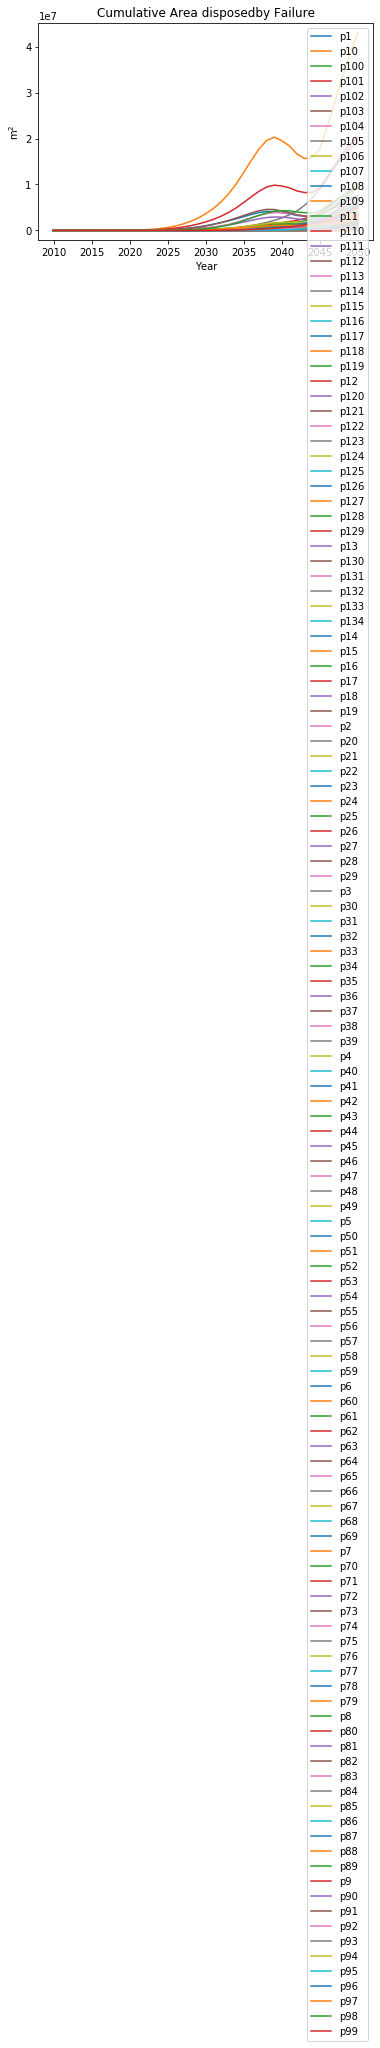

In [87]:
r1.plotScenariosComparison(keyword='Cumulative_Area_disposedby_Failure')

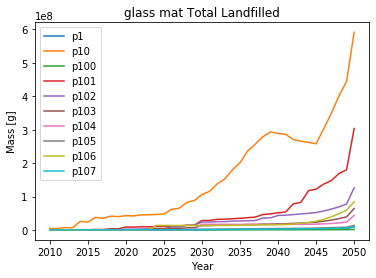

In [25]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

# GEOPANDAS

In [88]:
latitude_all =[]
longitude_all = []
cumulativewaste2050 = []
for scen in r1.scenario.keys():
    latitude_all.append(r1.scenario[scen].latitude)
    longitude_all.append(r1.scenario[scen].longitude)
    cumulativewaste2050.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

street_map = gpd.read_file(r'C:\Users\sayala\Desktop\geopandas\cb_2018_us_nation_20m\cb_2018_us_nation_20m.shp')

# Show the map only
#fig, ax = plt.subplots(figsize=(10,15))
#street_map.plot(ax=ax)

In [90]:
frame = { 'Latitude': latitude_all, 'Longitude': longitude_all, 'CumulativeWaste2050': cumulativewaste2050}   
df = pd.DataFrame(frame) 

In [91]:
df.head()

,Latitude,Longitude,CumulativeWaste2050
0,47.820991,-121.452252,6.602515e+07
1,35.120104,-117.159039,6.466174e+09
2,38.791108,-78.257714,1.016455e+07
3,28.708695,-82.192477,1.918125e+09
4,26.677092,-80.563731,1.016534e+09


In [92]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geometry[:3]

In [94]:
crs = {'init':'epsg:4326'}

In [95]:
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created
geo_df.head()

,Latitude,Longitude,CumulativeWaste2050,geometry
0,47.820991,-121.452252,6.602515e+07,POINT (-121.45225 47.82099)
1,35.120104,-117.159039,6.466174e+09,POINT (-117.15904 35.12010)
2,38.791108,-78.257714,1.016455e+07,POINT (-78.25771 38.79111)
3,28.708695,-82.192477,1.918125e+09,POINT (-82.19248 28.70870)
4,26.677092,-80.563731,1.016534e+09,POINT (-80.56373 26.67709)


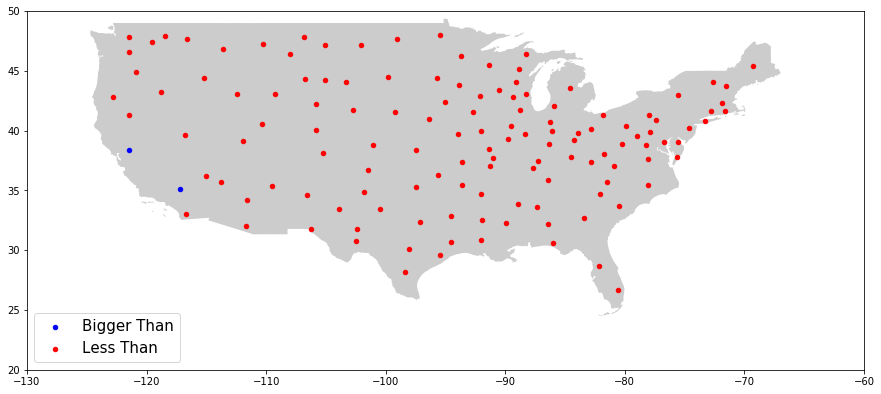

In [96]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['CumulativeWaste2050'] >= 1.918125e+09].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['CumulativeWaste2050'] < 1.918125e+09].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

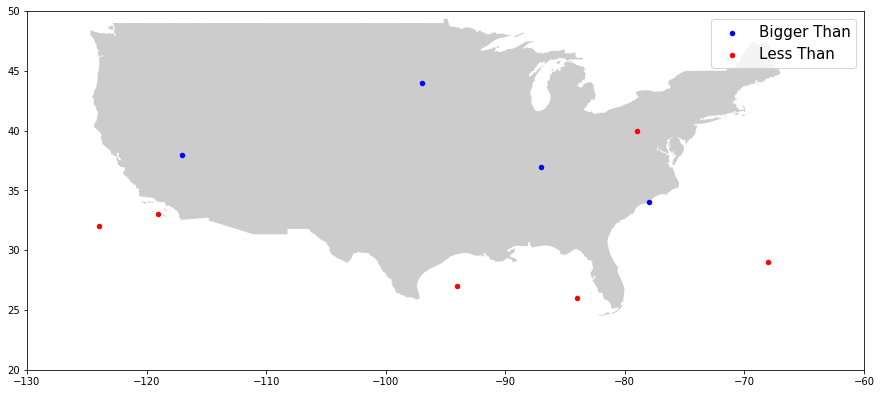

In [104]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

latitude = random.sample(range(25, 45), 10) 
longitude = random.sample(range(-125, -65), 10) 
weight = random.sample(range(0, 500), 10) 

frame = { 'Latitude': latitude, 'Longitude': longitude, 'Weight': weight}   
df = pd.DataFrame(frame) 

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
crs = {'init':'epsg:4326'}
geo_df = gpd.GeoDataFrame(df, # specify our data
                         crs = crs, # specify our coordinate reference system
                         geometry = geometry) # specify the geometry list we created

fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
geo_df[geo_df['Weight'] >=250].plot(ax=ax, markersize = 20, color= "blue", marker = "o", label = "Bigger Than")
geo_df[geo_df['Weight'] < 250].plot(ax=ax, markersize = 20, color= "red", marker = "o", label = "Less Than")
plt.xlim([-130, -60])
plt.ylim([20, 50])
plt.legend(prop={'size':15})

In [107]:
import geoplot


ModuleNotFoundError: No module named 'geoplot'

In [106]:
ax = street_map.kdeplot(
    geo_df, #clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

AttributeError: 'GeoDataFrame' object has no attribute 'kdeplot'

In [59]:
import scipy.stats
import seaborn.palettes
import seaborn.utils


In [63]:
axis = [-130, 48.1667, -70, 100.1667]

In [ ]:
latlng_bounds = area.total_bounds
area = area.to_crs(epsg=3857)
axis = area.total_bounds

# Create the map stretching over the requested area
ax = area.plot(alpha=0)

In [64]:
# Calculate the KDE
data = np.c_[df.Longitude, df.Latitude]
kde = scipy.stats.gaussian_kde(data.T, bw_method="scott", weights=df.CumulativeWaste2050)
data_std = data.std(axis=0, ddof=1)
bw_x = getattr(kde, "scotts_factor")() * data_std[0]
bw_y = getattr(kde, "scotts_factor")() * data_std[1]
grid_x = grid_y = 100
x_support = seaborn.utils._kde_support(data[:, 0], bw_x, grid_x, 3, (axis[0], axis[2]))
y_support = seaborn.utils._kde_support(data[:, 1], bw_y, grid_y, 3, (axis[1], axis[3]))
xx, yy = np.meshgrid(x_support, y_support)
levels = kde([xx.ravel(), yy.ravel()]).reshape(xx.shape)

In [65]:
cset = ax.contourf(xx, yy, levels,
    20, # n_levels

    cmap=seaborn.palettes.blend_palette(('#ffffff10', '#ff0000af'), 6, as_cmap=True),
    antialiased=True,       # avoids lines on the contours to some extent
)

{'ax': <matplotlib.axes._subplots.AxesSubplot at 0x1c476e256d8>,
 'levels': array([0.00e+00, 6.00e-06, 1.20e-05, 1.80e-05, 2.40e-05, 3.00e-05,
        3.60e-05, 4.20e-05, 4.80e-05, 5.40e-05, 6.00e-05, 6.60e-05,
        7.20e-05, 7.80e-05, 8.40e-05, 9.00e-05, 9.60e-05, 1.02e-04,
        1.08e-04, 1.14e-04, 1.20e-04, 1.26e-04]),
 'filled': True,
 'linewidths': None,
 'linestyles': None,
 'hatches': [None],
 'alpha': None,
 'origin': None,
 'extent': None,
 'colors': None,
 'extend': 'neither',
 'antialiased': True,
 'nchunk': 0,
 'locator': <matplotlib.ticker.MaxNLocator at 0x1c473904278>,
 'logscale': False,
 '_transform': <matplotlib.transforms.CompositeGenericTransform at 0x1c476d07908>,
 '_corner_mask': True,
 'zmax': 0.0001212369224774274,
 'zmin': 7.808335276544815e-10,
 '_mins': [-130.0, 48.1667],
 '_maxs': [-70.0, 64.39517367456808],
 '_contour_generator': <matplotlib.QuadContourGenerator at 0x1c47461c630>,
 '_levels': array([0.00e+00, 6.00e-06, 1.20e-05, 1.80e-05, 2.40e-05, 3.00

In [66]:
def add_basemap(ax, latlng_bounds, axis, url='https://a.basemaps.cartocdn.com/light_all/tileZ/tileX/tileY@2x.png'):
    prev_ax = ax.axis()
    # TODO: Zoom should surely take output pixel request size into account...
    zoom = ctx.tile._calculate_zoom(*latlng_bounds)
    while ctx.tile.howmany(*latlng_bounds, zoom, ll=True) > max_tiles:      # dont ever try to download loads of tiles
        zoom = zoom - 1
    print("downloading %d tiles with zoom level %d" % (ctx.tile.howmany(*latlng_bounds, zoom, ll=True), zoom))
    basemap, extent = ctx.bounds2img(*axis, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    ax.axis(prev_ax)        # restore axis after changing the background
 
add_basemap(ax, latlng_bounds, axis)

NameError: name 'latlng_bounds' is not defined

In [ ]:
import geopandas as gpd


import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

def make_plot(projection_name, projection_crs, extent, heat_data):
    """
    ?
    """
    fig = plt.figure()
    rect = 0.1, 0.1, 0.8, 0.8
    ax = fig.add_axes(rect, projection=projection_crs)

    # Set display limits to include a set region of latitude * longitude.
    # (Note: Cartopy-specific).
    ax.set_extent(extent, crs=projection_crs)

    # Add coastlines and meridians/parallels (Cartopy-specific).
    ax.coastlines(linewidth=0.2, color='black')
    ax.gridlines(crs=projection_crs, linestyle='-')

    lat = np.linspace(extent[0],extent[1],heat_data.shape[0])
    lon = np.linspace(extent[2],extent[3],heat_data.shape[1])
    Lat,Lon = np.meshgrid(lat,lon)
    ax.pcolormesh(Lat,Lon,np.transpose(heat_data))
    plt.savefig("Test_fig.pdf", bbox_inches='tight')


def main():
    #extent = (-65.0, -62, 44, 45.5)
    extent = (-90, -40, 30, 60)
    # Define some test points with latitude and longitude coordinates.
    #city_data = [('Halifax, NS', 44.67, -63.61, 'black'),
    #             ('Neighbour', 45, -63, 'blue'),
    #             ('Other_Place', 44.1, -64, 'red')]
    heat_data = np.random.normal(0.0,0.2,size=(100,150))

    # Demonstrate with two different display projections.
    # Define a Cartopy 'ordinary' lat-lon coordinate reference system.
    crs_latlon = ccrs.PlateCarree()
    make_plot('Equidistant Cylindrical', crs_latlon, extent, heat_data)
    #crs_ae = ccrs.LambertCylindrical()
    #make_plot('Lambert Cylindrical', crs_ae, extent, heat_data)

if __name__ == '__main__':
    main()